<a href="https://colab.research.google.com/github/tayyabaarooj/fyp/blob/main/skin_cancer_malignant_vs_benign_Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
train_ds="/content/drive/MyDrive/dataset/skinCancer/train"
test_ds="/content/drive/MyDrive/dataset/skinCancer/test"


# Data preprocessing
****

In [ ]:
os.listdir('/content/drive/MyDrive/dataset/skinCancer/train')

['benign', 'malignant']

In [ ]:
batch_size=32
img_size=224

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2
                             )

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_ds,
                                                target_size=(img_size, img_size),
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

Found 2467 images belonging to 2 classes.
Found 519 images belonging to 2 classes.


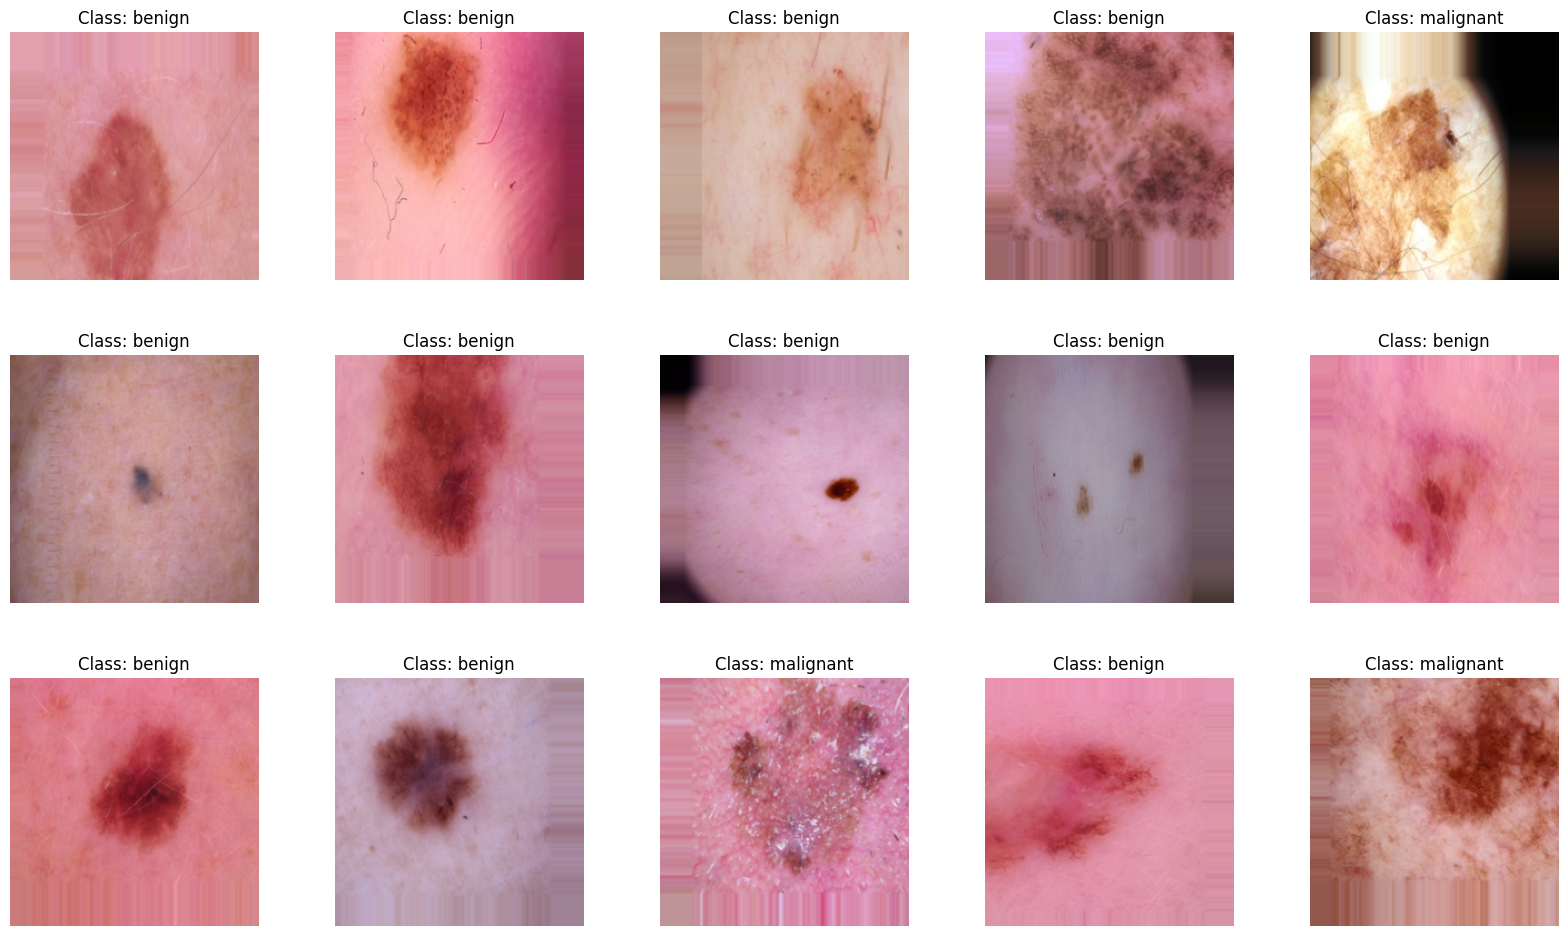

In [ ]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [ ]:
print(len(train_generator))
print(len(test_ds))


78
46


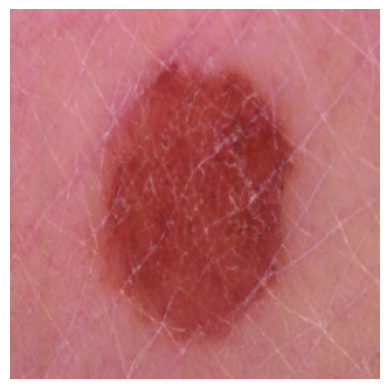

In [ ]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/content/drive/MyDrive/dataset/skinCancer/train/benign/1001.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
from keras.layers import MaxPool2D

In [ ]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D

# Build Xception Model

In [ ]:
from keras.layers import MaxPool2D

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D

# Define input shape
input_shape = (img_size, img_size, 3)

# Create a Sequential model
model = Sequential([
    # Entry Flow
    Conv2D(32, (3, 3), strides=(2, 2), activation='relu', input_shape=input_shape),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    SeparableConv2D(128, (3, 3), activation='relu', padding='same'),
    SeparableConv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    SeparableConv2D(256, (3, 3), activation='relu', padding='same'),
    SeparableConv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    # Middle Flow
    SeparableConv2D(512, (3, 3), activation='relu', padding='same'),
    SeparableConv2D(512, (3, 3), activation='relu', padding='same'),
    SeparableConv2D(512, (3, 3), activation='relu', padding='same'),

    # Exit Flow
    SeparableConv2D(728, (3, 3), activation='relu', padding='same'),
    SeparableConv2D(1024, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    SeparableConv2D(1536, (3, 3), activation='relu', padding='same'),
    SeparableConv2D(2048, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    # Output
    GlobalAveragePooling2D(),
    Dense(2, activation='softmax')
])

#   Model summary

In [ ]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 111, 111, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 54, 54, 64)        0         
 D)                                                              
                                                                 
 separable_conv2d (Separabl  (None, 54, 54, 128)       8896      
 eConv2D)                                                        
                                                                 
 separable_conv2d_1 (Separa  (None, 54, 54, 128)       17664     
 bleConv2D)                                                      
                                                        

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    epochs=5,
                    validation_data=test_generator)


Epoch 1/5
78/78 [==============================] - 417s 5s/step - loss: 0.6921 - accuracy: 0.5294 - val_loss: 0.6974 - val_accuracy: 0.4220
Epoch 2/5
78/78 [==============================] - 411s 5s/step - loss: 0.6920 - accuracy: 0.5294 - val_loss: 0.6981 - val_accuracy: 0.4220
Epoch 3/5
78/78 [==============================] - 409s 5s/step - loss: 0.6918 - accuracy: 0.5294 - val_loss: 0.6985 - val_accuracy: 0.4220
Epoch 4/5
78/78 [==============================] - 432s 6s/step - loss: 0.6918 - accuracy: 0.5294 - val_loss: 0.6988 - val_accuracy: 0.4220
Epoch 5/5
78/78 [==============================] - 435s 6s/step - loss: 0.6918 - accuracy: 0.5294 - val_loss: 0.6992 - val_accuracy: 0.4220


In [ ]:
n_categories = len(os.listdir('/content/drive/MyDrive/dataset/skinCancer/test'))# number of categories print(n_categories)

In [ ]:
n_categories

2

In [ ]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,0.692084,0.529388,0.697404,0.421965
1,0.691957,0.529388,0.698072,0.421965
2,0.691845,0.529388,0.698524,0.421965
3,0.691786,0.529388,0.698812,0.421965
4,0.691757,0.529388,0.699156,0.421965


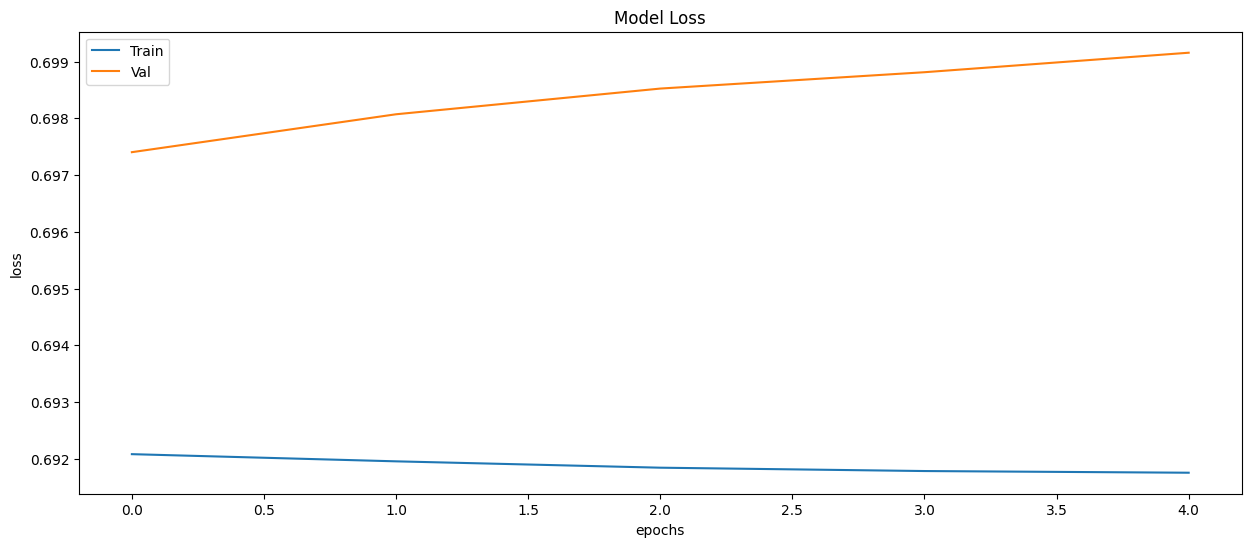

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

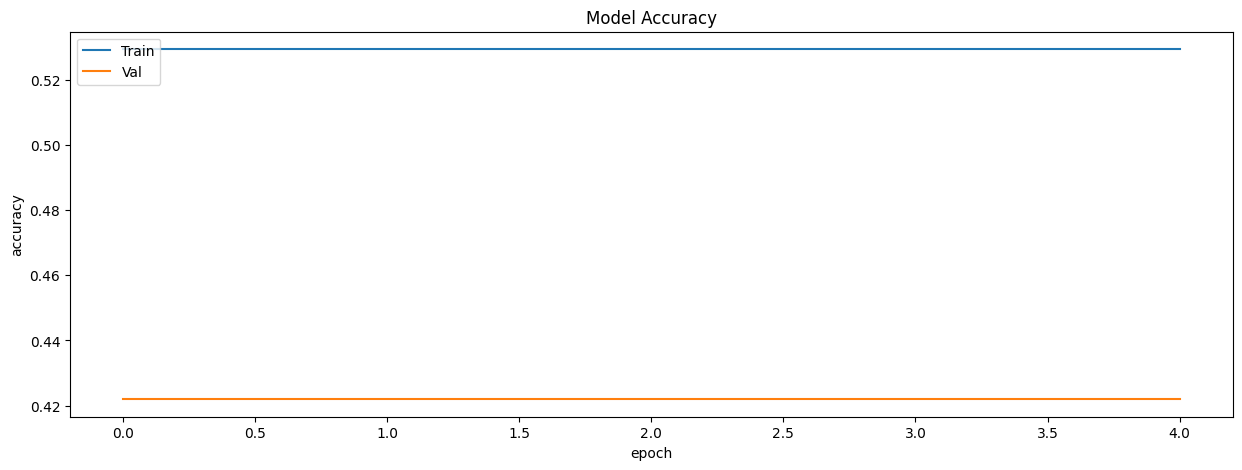

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

17/17 [==============================] - 21s 1s/step


In [ ]:
results =model.evaluate(test_generator)

17/17 [==============================] - 22s 1s/step - loss: 0.6992 - accuracy: 0.4220


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.42      1.00      0.59       219
           1       0.00      0.00      0.00       300

    accuracy                           0.42       519
   macro avg       0.21      0.50      0.30       519
weighted avg       0.18      0.42      0.25       519



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


7/7 [==============================] - 9s 1s/step


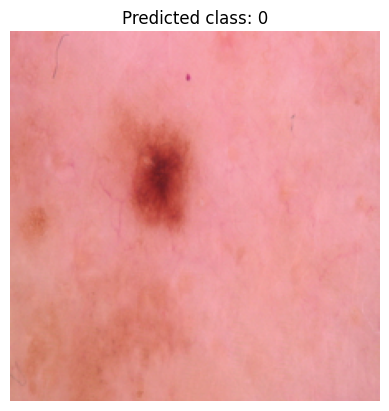

In [ ]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/content/drive/MyDrive/dataset/skinCancer/test/benign'
img_size = 224

images = []
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()

In [ ]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : benign
Class probability: 0.5173201
Predicted class for 2.jpg : benign
Class probability: 0.5173201
Predicted class for 3.jpg : benign
Class probability: 0.5173201
Predicted class for 4.jpg : benign
Class probability: 0.5173201
Predicted class for 5.jpg : benign
Class probability: 0.5173201
Predicted class for 6.jpg : benign
Class probability: 0.5173201
Predicted class for 7.jpg : benign
Class probability: 0.5173201
Predicted class for 8.jpg : benign
Class probability: 0.5173201
Predicted class for 9.jpg : benign
Class probability: 0.5173201
Predicted class for 10.jpg : benign
Class probability: 0.5173201
Predicted class for 11.jpg : benign
Class probability: 0.5173201
Predicted class for 12.jpg : benign
Class probability: 0.5173201
Predicted class for 13.jpg : benign
Class probability: 0.5173201
Predicted class for 14.jpg : benign
Class probability: 0.5173201
Predicted class for 15.jpg : benign
Class probability: 0.5173201
Predicted class for 16.jpg : benig

# Thank You !